# ニューラルネットワーク

# 活性化関数
- シグモイド関数(1/1+exp(-x))   (0~1を返す)
- ReLU関数 


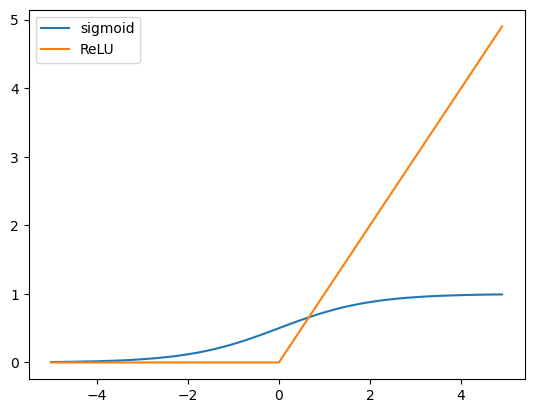

In [27]:
import numpy as np
import matplotlib.pyplot as plt

###シグモイド関数の実装###
def sigmoid(x):

    return 1/(1+np.exp(-x))    #単純な実装
    

###ReLU関数の実装###
def ReLU(x):
    return np.maximum(0, x)

x = np.arange(-5, 5, 0.1)
y1 =sigmoid(x)
y2 =ReLU(x)
plt.plot(x, y1, label="sigmoid")
plt.plot(x, y2, label="ReLU")
plt.legend()
plt.show()


### 3層のニューラルネットワーク

In [18]:
def init_network():

    #入力が２ユニット,出力が２ユニット,隠れ層１が３ユニット，隠れ層２が２ユニットの場合
    network ={}
    network["W1"] = np.array([[1,1, 1], [1, 1, 1]]) #2*3
    network["W2"] = np.array([[1, 1], [1, 1], [1, 1]]) #3*2
    network["W3"] = np.array([[1, 1], [1, 1]])
    network["b1"] = np.array([1, 1, 1])
    network["b2"] = np.array([1, 1])
    network["b3"] = np.array([1, 1])

    return network

def forward(network, x):
    y1 = ReLU(np.dot(x, network["W1"]) + network["b1"])
    y2 = ReLU(np.dot(y1, network["W2"]) + network["b2"])
    y3 = sigmoid(np.dot(y2, network["W3"]) + network["b3"])

    return y3

network = init_network()
x = np.array([5, 10])
y = forward(network, x)
print(y)

    

[1. 1.]


### 出力層
- 確率に変換するソフトマックス関数(exp(y) / sum( exp(yi) ))

In [25]:
def softmax(y):
    #return np.exp(y) / np.sum(np.exp(y))   単純な実装

    #オーバーフロー対策
    c=np.max(y)
    exp_y = np.exp(y-c)
    return exp_y / np.sum(exp_y)

softmax(np.array([1010, 1000, 990]))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])